In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


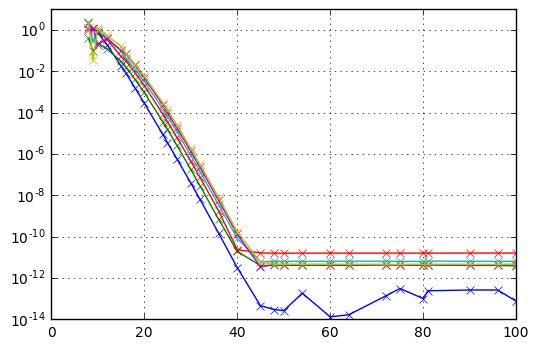

In [2]:
D = loadtxt("../../fft/pw.txt", skiprows=5)

Ng = D[:, 0]
pw_eigs = D[:, 2:]

eigs_conv = pw_eigs[-1,:]
for i in range(6):
    semilogy(Ng, abs(pw_eigs[:, i]-eigs_conv[i]), "x-")
grid()
xlim([0, 100])
show()

In [3]:
print "Converged (reference) eigenvalues"
for i in range(6):
    print i+1, eigs_conv[i]

Converged (reference) eigenvalues
1 -6.76750406317
2 -3.66202704223
3 -1.25970344833
4 0.686994595794
5 2.30360396262
6 3.65162494836


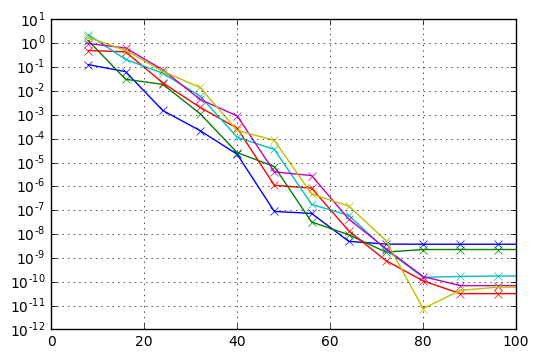

In [4]:
D = loadtxt("../sfem.txt")

sfem_DOFs = D[:, 0]
sfem_p = D[:, 1]
sfem_eigs = D[:, 5:]

for i in range(6):
    semilogy(sfem_DOFs, abs(sfem_eigs[:, i]-eigs_conv[i]), "x-")
grid()
xlim([0, 100])
show()

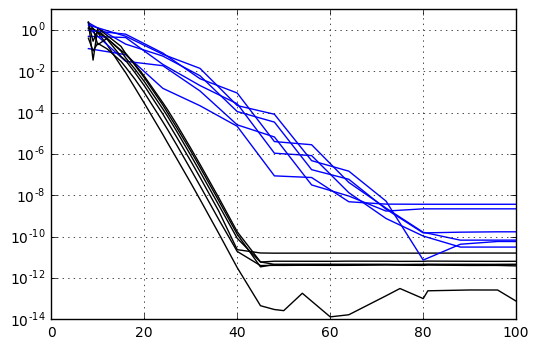

In [5]:
for i in range(6):
    semilogy(Ng, abs(pw_eigs[:, i]-eigs_conv[i]), "k-")
    semilogy(sfem_DOFs, abs(sfem_eigs[:, i]-eigs_conv[i]), "b-")
grid()
xlim([0, 100])
show()